# Tugas 2

- Silahkan mencari dataset lain. Dari dataset tersebut, ambil 1000 baris saja untuk mempercepat komputasi
- Dengan menggunakan kombinasi antara BOW atau TF-IDF, pasangkan dengan model klasifikasi, seperti MLP, DT, RF, LR, AdaBoost, dll
- Tampilkan hasilnya, dan pilih kombinasi terbaik (feature extraction method + classifier)

sentiment analysis using https://www.kaggle.com/datasets/anggapurnama/twitter-dataset-ppkm dataset from Kaggle and build classification models.

Label: 0 (Positive), 1 (Neutral), 2 (Negative)

In [1]:
%pip install --upgrade git+https://github.com/ariaghora/mpstemmer.git

  Cloning https://github.com/ariaghora/mpstemmer.git to /tmp/pip-req-build-n3jgjcxl
  Running command git clone --filter=blob:none --quiet https://github.com/ariaghora/mpstemmer.git /tmp/pip-req-build-n3jgjcxl
  Resolved https://github.com/ariaghora/mpstemmer.git to commit 25a5fd923af163a7eac3a5ec976984156ca8fa8b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_csv("data/indoppkmtweet.csv", sep="\t")
df.head()

,Date,User,Tweet,sentiment
0,2022-03-31 14:32:04+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,2022-03-31 09:26:00+00:00,inewsdotid,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,2022-03-31 05:02:34+00:00,vdvc_talk,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,2022-03-30 14:23:10+00:00,pikobar_jabar,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,2022-03-30 11:28:57+00:00,tvOneNews,Kementerian Agama menerbitkan Surat Edaran Nom...,1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from collections import Counter
import string
import re
from mpstemmer import MPStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report

In [4]:
df = pd.read_csv("data/indoppkmtweet.csv", sep="\t")
df.drop(columns=["Date", "User"], inplace=True)
df.head()

,Tweet,sentiment
0,Ketahui informasi pembagian #PPKM di wilayah J...,1
1,Tempat Ibadah di Wilayah PPKM Level 1 Boleh Be...,1
2,"Juru bicara Satgas Covid-19, Wiku Adisasmito m...",1
3,Ketahui informasi pembagian #PPKM di wilayah J...,1
4,Kementerian Agama menerbitkan Surat Edaran Nom...,1


In [5]:
df["Tweet"] = df["Tweet"].str.lower()
df.head()

,Tweet,sentiment
0,ketahui informasi pembagian #ppkm di wilayah j...,1
1,tempat ibadah di wilayah ppkm level 1 boleh be...,1
2,"juru bicara satgas covid-19, wiku adisasmito m...",1
3,ketahui informasi pembagian #ppkm di wilayah j...,1
4,kementerian agama menerbitkan surat edaran nom...,1


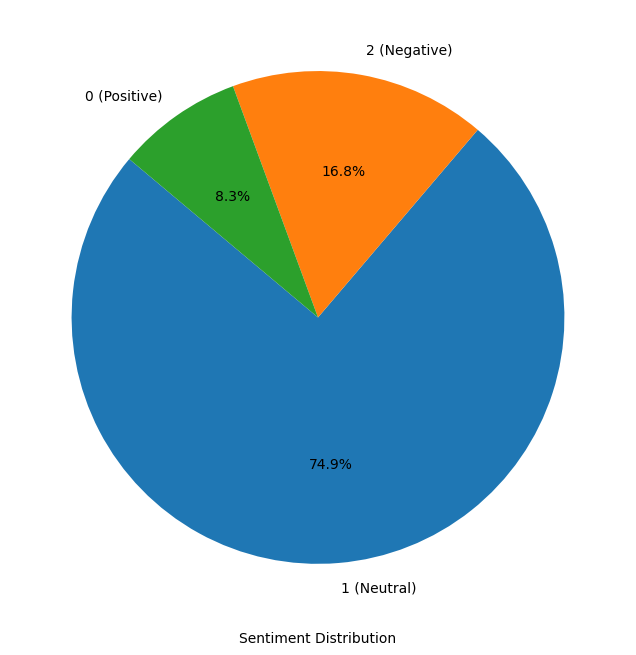

In [6]:
sentiment_counts = df["sentiment"].value_counts()

label_dict = {0: "0 (Positive)", 1: "1 (Neutral)", 2: "2 (Negative)"}

# Buat daftar label sesuai dengan urutan di sentiment_counts
labels = [label_dict[key] for key in sentiment_counts.index]

# pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=labels, autopct="%1.1f%%", startangle=140)
plt.xlabel("Sentiment Distribution")
plt.show()

# Label: 0 (Positive), 1 (Neutral), 2 (Negative)

In [7]:
# fungsi clearning tweet and stemming indonesian words
def remove_hashtags(text):
    tokens = text.split()
    tokens_without_hashtags = [token for token in tokens if not token.startswith("#")]
    return " ".join(tokens_without_hashtags)

def remove_refs(text):
    tokens = text.split()
    tokens_without_hashtags = [token for token in tokens if not token.startswith("@")]
    return " ".join(tokens_without_hashtags)

def remove_links(text):
    tokens = text.split()
    tokens_without_hashtags = [token for token in tokens if not "http" in token]
    return " ".join(tokens_without_hashtags)

def remove_puncs(text):
    for char in string.punctuation:
        text = text.replace(char, "")
    return " ".join(text.split())

def remove_emojis(text):
    emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoji, '', text)

stemmer = MPStemmer()

contoh = "yuk kakak dibeli #netflix nya, murah kok, cuma 25rb/bulan, bisa nonton 📺 unlimited film dan series, minat? langsung chat aja ya @netflixid https://netflix.com"

print(remove_hashtags(contoh))
print(remove_refs(contoh))
print(remove_links(contoh))
print(remove_puncs(contoh))
print(remove_emojis(contoh))
print(stemmer.stem_kalimat(contoh))

yuk kakak dibeli nya, murah kok, cuma 25rb/bulan, bisa nonton 📺 unlimited film dan series, minat? langsung chat aja ya @netflixid https://netflix.com
yuk kakak dibeli #netflix nya, murah kok, cuma 25rb/bulan, bisa nonton 📺 unlimited film dan series, minat? langsung chat aja ya https://netflix.com
yuk kakak dibeli #netflix nya, murah kok, cuma 25rb/bulan, bisa nonton 📺 unlimited film dan series, minat? langsung chat aja ya @netflixid
yuk kakak dibeli netflix nya murah kok cuma 25rbbulan bisa nonton 📺 unlimited film dan series minat langsung chat aja ya netflixid httpsnetflixcom
yuk kakak dibeli #netflix nya, murah kok, cuma 25rb/bulan, bisa nonton  unlimited film dan series, minat? langsung chat aja ya @netflixid https://netflix.com
ayo kakak beli #netflix nya, murah kok, cuma 25rb/bulan, bisa tonton 📺 unlimited film dan series, minat? langsung chat aja iya @netflixid https://netflix.com


In [11]:
word_counts = Counter()

df['Tweet'] = df['Tweet'].apply(lambda x: remove_hashtags(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_refs(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_links(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_puncs(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_emojis(x))
df['Tweet'] = df['Tweet'].apply(lambda x: stemmer.stem_kalimat(x))

df['Tweet'].str.split().apply(word_counts.update)

print(word_counts)

Counter({'ppkm': 9486, 'di': 8310, 'dan': 6063, 'yang': 4899, 'ini': 3897, 'level': 3202, 'tidak': 2976, 'untuk': 2770, 'panjang': 2622, 'laku': 2207, 'covid19': 2146, 'masyarakat': 2022, '3': 1994, 'ada': 1782, 'perin': 1697, 'dengan': 1688, '2021': 1686, 'kota': 1559, 'dari': 1507, 'batas': 1506, 'darurat': 1466, 'bisa': 1416, 'sehat': 1415, 'rumah': 1393, 'giat': 1388, 'lengkap': 1350, 'kita': 1318, '4': 1256, 'jadi': 1228, 'jakarta': 1226, 'iya': 1222, 'terap': 1217, 'dalam': 1215, 'jalan': 1212, 'sama': 1151, 'tetap': 1142, 'hari': 1122, 'terus': 1118, '2': 1097, 'lama': 1074, 'ke': 1061, 'lagi': 1024, 'atur': 1023, 'baru': 1017, 'wilayah': 1015, 'akan': 983, 'hingga': 977, 'kasus': 970, 'saat': 961, 'jangan': 961, 'harus': 960, 'indonesia': 916, 'ikut': 915, 'keluar': 894, 'warga': 886, 'protokol': 885, 'bagi': 880, 'pada': 880, 'itu': 858, 'sudah': 846, 'apa': 837, 'masih': 834, 'tangan': 827, 'sampai': 804, 'turun': 793, 'ayo': 774, 'jaga': 767, 'mulai': 766, 'mikro': 756, 'aja

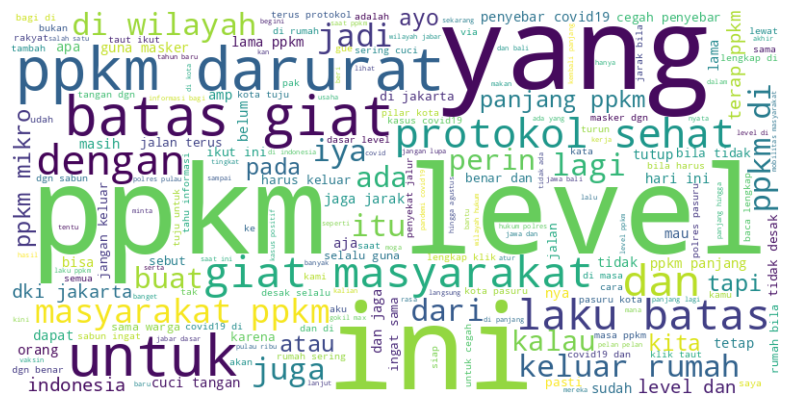

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(df['Tweet'])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [17]:
df.shape

(23644, 2)

In [18]:
# split and pipeline
# classification using logistic regression, KNN, Random Forest, Multilayer Perceptron, and AdaBoost
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

X = df["Tweet"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


bow_lr_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

tfidf_lr_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", LogisticRegression(max_iter=1000))
])

bow_svm_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", SVC())
])

tfidf_svm_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", SVC())
])

bow_rf_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", RandomForestClassifier())
])

tfidf_rf_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", RandomForestClassifier())
])

bow_mlp_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", MLPClassifier())
])

tfidf_mlp_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", MLPClassifier())
])

bow_ada_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", AdaBoostClassifier())
])

tfidf_ada_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", AdaBoostClassifier())
])

bow_dt_pipeline = Pipeline([
    ("vect", CountVectorizer()),
    ("clf", DecisionTreeClassifier())
])

tfidf_dt_pipeline = Pipeline([
    ("vect", TfidfVectorizer()),
    ("clf", DecisionTreeClassifier())
])

In [21]:
benchmark = []

In [22]:
# accuracy score, precision, recall
from sklearn.metrics import accuracy_score, precision_score, recall_score

bow_lr_pipeline.fit(X_train, y_train)
bow_lr_pred = bow_lr_pipeline.predict(X_test)

print("BoW Logistic Regression accuracy: ", accuracy_score(y_test, bow_lr_pred))
print("BoW Logistic Regression precision: ", precision_score(y_test, bow_lr_pred, average='macro'))
print("BoW Logistic Regression recall: ", recall_score(y_test, bow_lr_pred, average='macro'))

benchmark.append({
    "model": "BoW Logistic Regression",
    "accuracy": accuracy_score(y_test, bow_lr_pred),
    "precision": precision_score(y_test, bow_lr_pred, average='macro'),
    "recall": recall_score(y_test, bow_lr_pred, average='macro')
})

BoW Logistic Regression accuracy:  0.8652992175935715
BoW Logistic Regression precision:  0.7783676972512262
BoW Logistic Regression recall:  0.7088150421828484


In [23]:
# tfidf logistic regression

tfidf_lr_pipeline.fit(X_train, y_train)
tfidf_lr_pred = tfidf_lr_pipeline.predict(X_test)

print("TF-IDF Logistic Regression accuracy: ", accuracy_score(y_test, tfidf_lr_pred))
print("TF-IDF Logistic Regression precision: ", precision_score(y_test, tfidf_lr_pred, average='macro'))
print("TF-IDF Logistic Regression recall: ", recall_score(y_test, tfidf_lr_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF Logistic Regression",
    "accuracy": accuracy_score(y_test, tfidf_lr_pred),
    "precision": precision_score(y_test, tfidf_lr_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_lr_pred, average='macro')
})

TF-IDF Logistic Regression accuracy:  0.8593783040812011
TF-IDF Logistic Regression precision:  0.7978026999192194
TF-IDF Logistic Regression recall:  0.6675020927042118


In [24]:
# bow svm

bow_svm_pipeline.fit(X_train, y_train)
bow_svm_pred = bow_svm_pipeline.predict(X_test)

print("BoW SVM accuracy: ", accuracy_score(y_test, bow_svm_pred))
print("BoW SVM precision: ", precision_score(y_test, bow_svm_pred, average='macro'))
print("BoW SVM recall: ", recall_score(y_test, bow_svm_pred, average='macro'))

benchmark.append({
    "model": "BoW SVM",
    "accuracy": accuracy_score(y_test, bow_svm_pred),
    "precision": precision_score(y_test, bow_svm_pred, average='macro'),
    "recall": recall_score(y_test, bow_svm_pred, average='macro')
})

BoW SVM accuracy:  0.8496510890251638
BoW SVM precision:  0.820145636042326
BoW SVM recall:  0.6109711682998347


In [25]:
# tfidf svm

tfidf_svm_pipeline.fit(X_train, y_train)
tfidf_svm_pred = tfidf_svm_pipeline.predict(X_test)

print("TF-IDF SVM accuracy: ", accuracy_score(y_test, tfidf_svm_pred))
print("TF-IDF SVM precision: ", precision_score(y_test, tfidf_svm_pred, average='macro'))
print("TF-IDF SVM recall: ", recall_score(y_test, tfidf_svm_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF SVM",
    "accuracy": accuracy_score(y_test, tfidf_svm_pred),
    "precision": precision_score(y_test, tfidf_svm_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_svm_pred, average='macro')
})

TF-IDF SVM accuracy:  0.8608585324592937
TF-IDF SVM precision:  0.8279117905500644
TF-IDF SVM recall:  0.6555194683204371


In [26]:
# bow random forest

bow_rf_pipeline.fit(X_train, y_train)
bow_rf_pred = bow_rf_pipeline.predict(X_test)

print("BoW Random Forest accuracy: ", accuracy_score(y_test, bow_rf_pred))
print("BoW Random Forest precision: ", precision_score(y_test, bow_rf_pred, average='macro'))
print("BoW Random Forest recall: ", recall_score(y_test, bow_rf_pred, average='macro'))

benchmark.append({
    "model": "BoW Random Forest",
    "accuracy": accuracy_score(y_test, bow_rf_pred),
    "precision": precision_score(y_test, bow_rf_pred, average='macro'),
    "recall": recall_score(y_test, bow_rf_pred, average='macro')
})

BoW Random Forest accuracy:  0.8352717276379784
BoW Random Forest precision:  0.8177628135611329
BoW Random Forest recall:  0.5732146128614745


In [27]:
# tfidf random forest

tfidf_rf_pipeline.fit(X_train, y_train)
tfidf_rf_pred = tfidf_rf_pipeline.predict(X_test)

print("TF-IDF Random Forest accuracy: ", accuracy_score(y_test, tfidf_rf_pred))
print("TF-IDF Random Forest precision: ", precision_score(y_test, tfidf_rf_pred, average='macro'))
print("TF-IDF Random Forest recall: ", recall_score(y_test, tfidf_rf_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF Random Forest",
    "accuracy": accuracy_score(y_test, tfidf_rf_pred),
    "precision": precision_score(y_test, tfidf_rf_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_rf_pred, average='macro')
})

TF-IDF Random Forest accuracy:  0.8280820469443857
TF-IDF Random Forest precision:  0.797839270557063
TF-IDF Random Forest recall:  0.5551994944763797


In [28]:
# bow mlp

bow_mlp_pipeline.fit(X_train, y_train)
bow_mlp_pred = bow_mlp_pipeline.predict(X_test)

print("BoW MLP accuracy: ", accuracy_score(y_test, bow_mlp_pred))
print("BoW MLP precision: ", precision_score(y_test, bow_mlp_pred, average='macro'))
print("BoW MLP recall: ", recall_score(y_test, bow_mlp_pred, average='macro'))

benchmark.append({
    "model": "BoW MLP",
    "accuracy": accuracy_score(y_test, bow_mlp_pred),
    "precision": precision_score(y_test, bow_mlp_pred, average='macro'),
    "recall": recall_score(y_test, bow_mlp_pred, average='macro')
})

BoW MLP accuracy:  0.8439416367096638
BoW MLP precision:  0.726951130495447
BoW MLP recall:  0.6876396735071538


In [29]:
# tfidf mlp

tfidf_mlp_pipeline.fit(X_train, y_train)
tfidf_mlp_pred = tfidf_mlp_pipeline.predict(X_test)

print("TF-IDF MLP accuracy: ", accuracy_score(y_test, tfidf_mlp_pred))
print("TF-IDF MLP precision: ", precision_score(y_test, tfidf_mlp_pred, average='macro'))
print("TF-IDF MLP recall: ", recall_score(y_test, tfidf_mlp_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF MLP",
    "accuracy": accuracy_score(y_test, tfidf_mlp_pred),
    "precision": precision_score(y_test, tfidf_mlp_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_mlp_pred, average='macro')
})

TF-IDF MLP accuracy:  0.8323112708817932
TF-IDF MLP precision:  0.697703030458631
TF-IDF MLP recall:  0.6948861297537142


In [30]:
# bow ada

bow_ada_pipeline.fit(X_train, y_train)
bow_ada_pred = bow_ada_pipeline.predict(X_test)

print("BoW AdaBoost accuracy: ", accuracy_score(y_test, bow_ada_pred))
print("BoW AdaBoost precision: ", precision_score(y_test, bow_ada_pred, average='macro'))
print("BoW AdaBoost recall: ", recall_score(y_test, bow_ada_pred, average='macro'))

benchmark.append({
    "model": "BoW AdaBoost",
    "accuracy": accuracy_score(y_test, bow_ada_pred),
    "precision": precision_score(y_test, bow_ada_pred, average='macro'),
    "recall": recall_score(y_test, bow_ada_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


BoW AdaBoost accuracy:  0.8120109959822372
BoW AdaBoost precision:  0.7154028507948776
BoW AdaBoost recall:  0.5709001219222424


In [31]:
# tfidf ada

tfidf_ada_pipeline.fit(X_train, y_train)
tfidf_ada_pred = tfidf_ada_pipeline.predict(X_test)

print("TF-IDF AdaBoost accuracy: ", accuracy_score(y_test, tfidf_ada_pred))
print("TF-IDF AdaBoost precision: ", precision_score(y_test, tfidf_ada_pred, average='macro'))
print("TF-IDF AdaBoost recall: ", recall_score(y_test, tfidf_ada_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF AdaBoost",
    "accuracy": accuracy_score(y_test, tfidf_ada_pred),
    "precision": precision_score(y_test, tfidf_ada_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_ada_pred, average='macro')
})

/home/aliif/Documents/kuliah/semester6/belajar-pandas/.venv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


TF-IDF AdaBoost accuracy:  0.8048213152886445
TF-IDF AdaBoost precision:  0.6887890578609889
TF-IDF AdaBoost recall:  0.5641399275548661


In [32]:
# bow dt

bow_dt_pipeline.fit(X_train, y_train)
bow_dt_pred = bow_dt_pipeline.predict(X_test)

print("BoW Decision Tree accuracy: ", accuracy_score(y_test, bow_dt_pred))
print("BoW Decision Tree precision: ", precision_score(y_test, bow_dt_pred, average='macro'))
print("BoW Decision Tree recall: ", recall_score(y_test, bow_dt_pred, average='macro'))

benchmark.append({
    "model": "BoW Decision Tree",
    "accuracy": accuracy_score(y_test, bow_dt_pred),
    "precision": precision_score(y_test, bow_dt_pred, average='macro'),
    "recall": recall_score(y_test, bow_dt_pred, average='macro')
})

BoW Decision Tree accuracy:  0.7904419539014591
BoW Decision Tree precision:  0.622566701224474
BoW Decision Tree recall:  0.5903044260140184


In [33]:
# tfidf dt

tfidf_dt_pipeline.fit(X_train, y_train)
tfidf_dt_pred = tfidf_dt_pipeline.predict(X_test)

print("TF-IDF Decision Tree accuracy: ", accuracy_score(y_test, tfidf_dt_pred))
print("TF-IDF Decision Tree precision: ", precision_score(y_test, tfidf_dt_pred, average='macro'))
print("TF-IDF Decision Tree recall: ", recall_score(y_test, tfidf_dt_pred, average='macro'))

benchmark.append({
    "model": "TF-IDF Decision Tree",
    "accuracy": accuracy_score(y_test, tfidf_dt_pred),
    "precision": precision_score(y_test, tfidf_dt_pred, average='macro'),
    "recall": recall_score(y_test, tfidf_dt_pred, average='macro')
})

TF-IDF Decision Tree accuracy:  0.7855783463734405
TF-IDF Decision Tree precision:  0.608050421657229
TF-IDF Decision Tree recall:  0.58176128791508


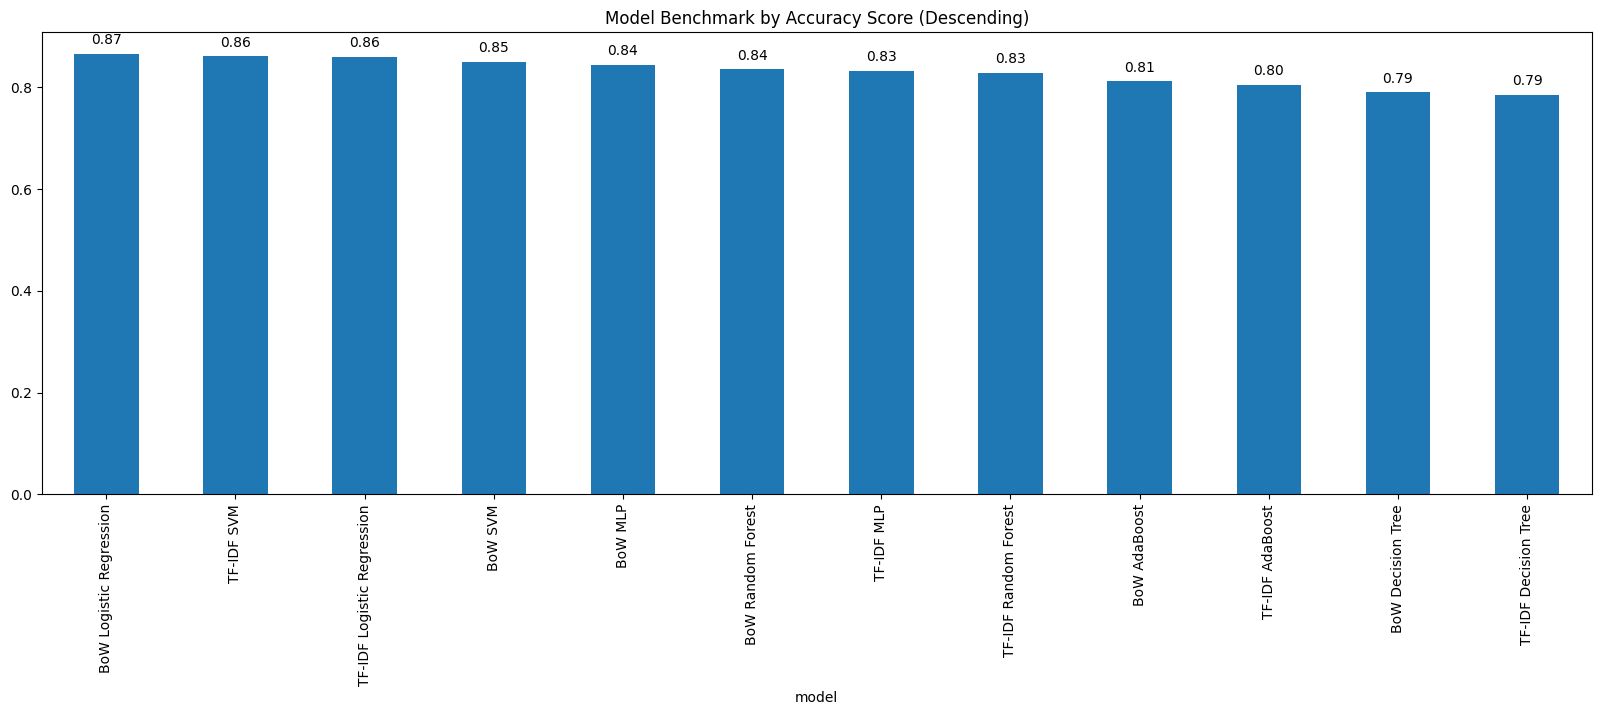

In [39]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='accuracy', ascending=False)
ax = df_benchmark['accuracy'].plot(kind='bar', figsize=(20, 6), legend=False)
plt.title('Model Benchmark by Accuracy Score (Descending)')

# Menambahkan nilai akurasi di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
plt.title('Model Benchmark by Accuracy Score (Descending)')
plt.show()

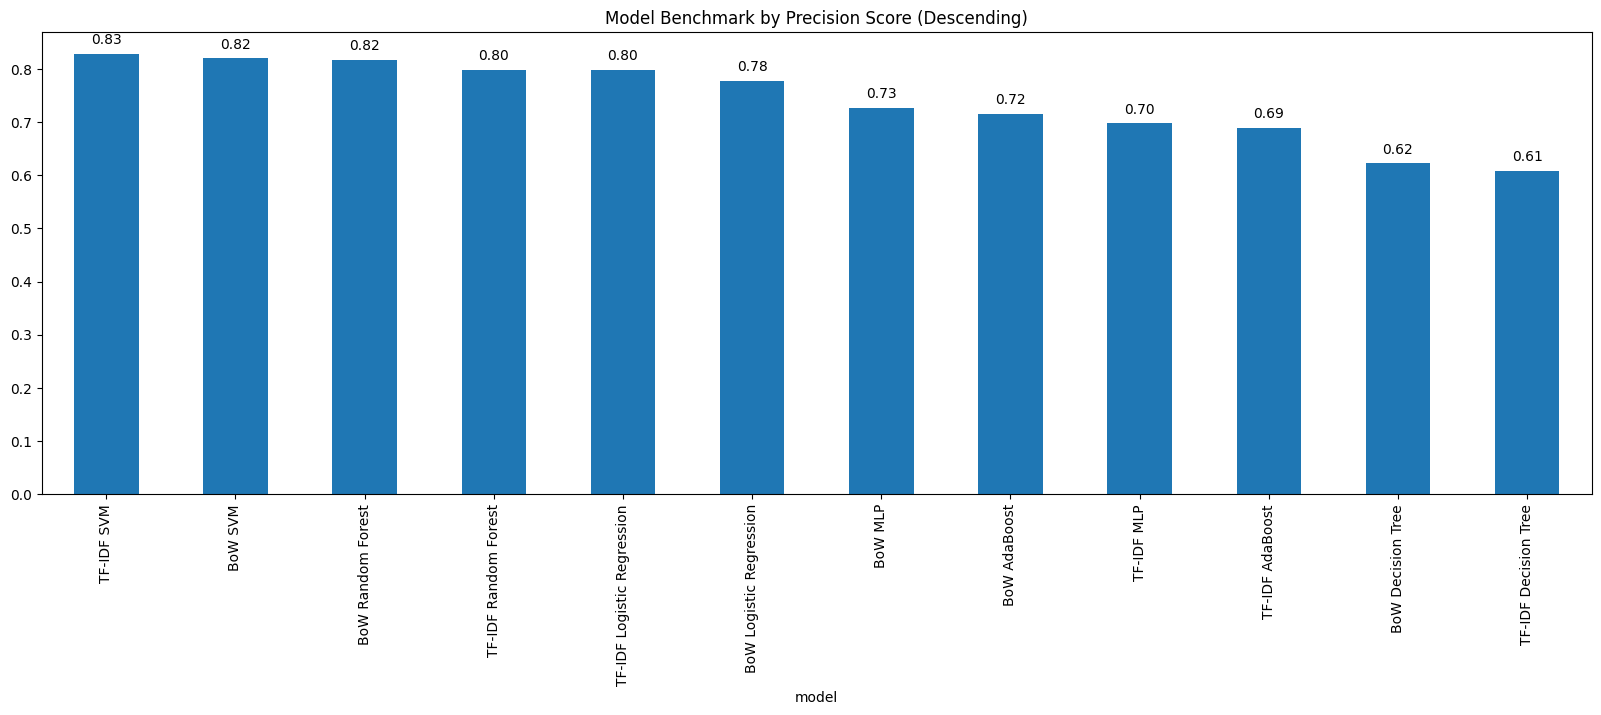

In [40]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='precision', ascending=False)
ax = df_benchmark['precision'].plot(kind='bar', figsize=(20, 6), legend=False)
plt.title('Model Benchmark by Precision Score (Descending)')

# Menambahkan nilai akurasi di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
plt.title('Model Benchmark by Precision Score (Descending)')
plt.show()

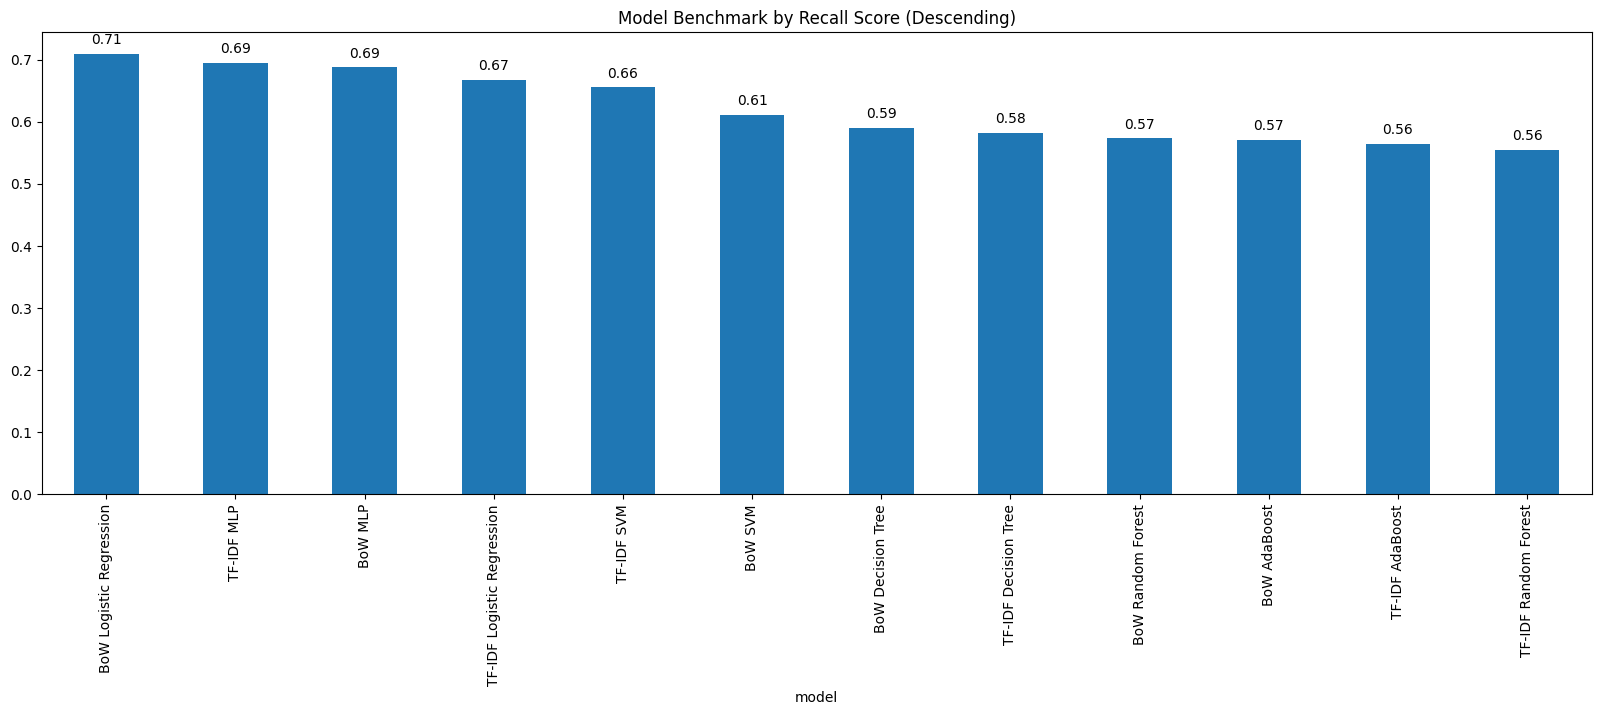

In [41]:
# visualizing all models performance
import matplotlib.pyplot as plt

df_benchmark = pd.DataFrame(benchmark)
df_benchmark.set_index('model', inplace=True)
# urutan model berdasarkan yang terbaik
df_benchmark = df_benchmark.sort_values(by='recall', ascending=False)
ax = df_benchmark['recall'].plot(kind='bar', figsize=(20, 6), legend=False)
plt.title('Model Benchmark by Recall Score (Descending)')

# Menambahkan nilai akurasi di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10), textcoords='offset points')
plt.title('Model Benchmark by Recall Score (Descending)')
plt.show()

In [38]:
print(benchmark)

[{'model': 'BoW Logistic Regression', 'accuracy': 0.8652992175935715, 'precision': 0.7783676972512262, 'recall': 0.7088150421828484}, {'model': 'TF-IDF Logistic Regression', 'accuracy': 0.8593783040812011, 'precision': 0.7978026999192194, 'recall': 0.6675020927042118}, {'model': 'BoW SVM', 'accuracy': 0.8496510890251638, 'precision': 0.820145636042326, 'recall': 0.6109711682998347}, {'model': 'TF-IDF SVM', 'accuracy': 0.8608585324592937, 'precision': 0.8279117905500644, 'recall': 0.6555194683204371}, {'model': 'BoW Random Forest', 'accuracy': 0.8352717276379784, 'precision': 0.8177628135611329, 'recall': 0.5732146128614745}, {'model': 'TF-IDF Random Forest', 'accuracy': 0.8280820469443857, 'precision': 0.797839270557063, 'recall': 0.5551994944763797}, {'model': 'BoW MLP', 'accuracy': 0.8439416367096638, 'precision': 0.726951130495447, 'recall': 0.6876396735071538}, {'model': 'TF-IDF MLP', 'accuracy': 0.8323112708817932, 'precision': 0.697703030458631, 'recall': 0.6948861297537142}, {'m